 # Factors Influencing High School Students' Academic Performance
 
This report examines the factors influencing high school students' academic performance using a dataset of students, detailing their demographics, study habits, parental involvement, and extracurricular activities. It explores how these variables, including weekly study time, absences, tutoring, parental support, and participation in sports, music, and volunteering, correlate with students' Grade Point Averages (GPA) and their classification into grade categories (A to F). The analysis aims to provide insights for educators and policymakers to develop targeted strategies to enhance academic success.

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

## Load, Understand, Explore, and Analyze the Data

- Load the data
- Display the first five (5) rows

In [2]:
# Dataset URL
dataset_url = "https://raw.githubusercontent.com/cogxen/datasets/main/student-performance/student-performance.csv"

# Load the data
students = pd.read_csv(dataset_url)

# Display the first five rows
students.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


- Display the shape of the DataFrame

In [3]:
students.shape

(2392, 15)

- Display DataFrame's data types 

In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


- Display DataFrame's statistical summary

In [5]:
students.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


- Conduct a null value inspection of the DataFrame

In [6]:
students.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

## Data Visualization I

### Exploring Data Distributions

To gain a better understanding of the data, we visualized the distribution of each variable. This helps to identify patterns, anomalies, and potential insights within the dataset.

- Define a function creating a plot distribution

In [7]:
def distribution(dataframe, columns, cols=3, width=20, height=5, hspace=0.45, wspace=0.5):
    plt.style.use('seaborn-v0_8-whitegrid')
    num_plots = math.ceil(float(len(columns)) / cols)
    
    for i in range(0, len(columns), cols):
        fig, axes = plt.subplots(nrows=1, ncols=cols, figsize=(width, height))
        fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
        subset = columns[i:i+cols]
        
        for j, column in enumerate(subset):
            ax = axes[j]
            ax.set_title(column)
            sns.histplot(dataframe[column], kde=True, ax=ax)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=25)
        
        # Remove empty subplots
        for k in range(len(subset), cols):
            fig.delaxes(axes[k])
        
        plt.tight_layout()
        plt.show()

- [`Age`, `Gender`, `Ethnicity`]

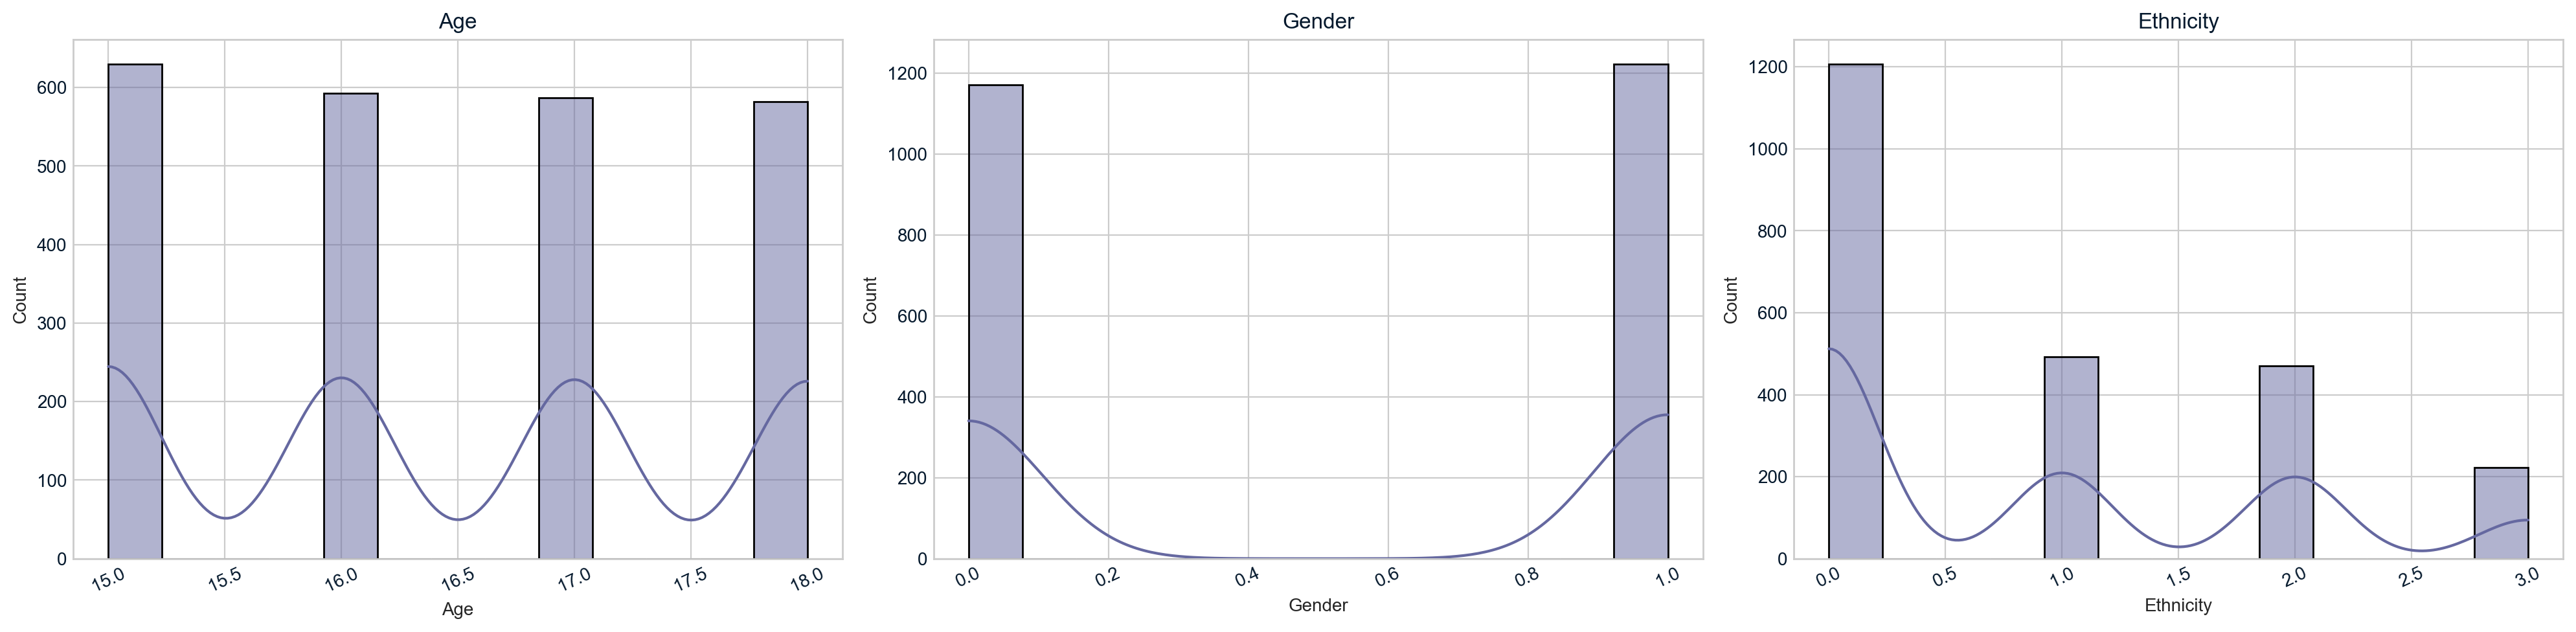

In [8]:
distribution(students, ["Age", "Gender", "Ethnicity"])

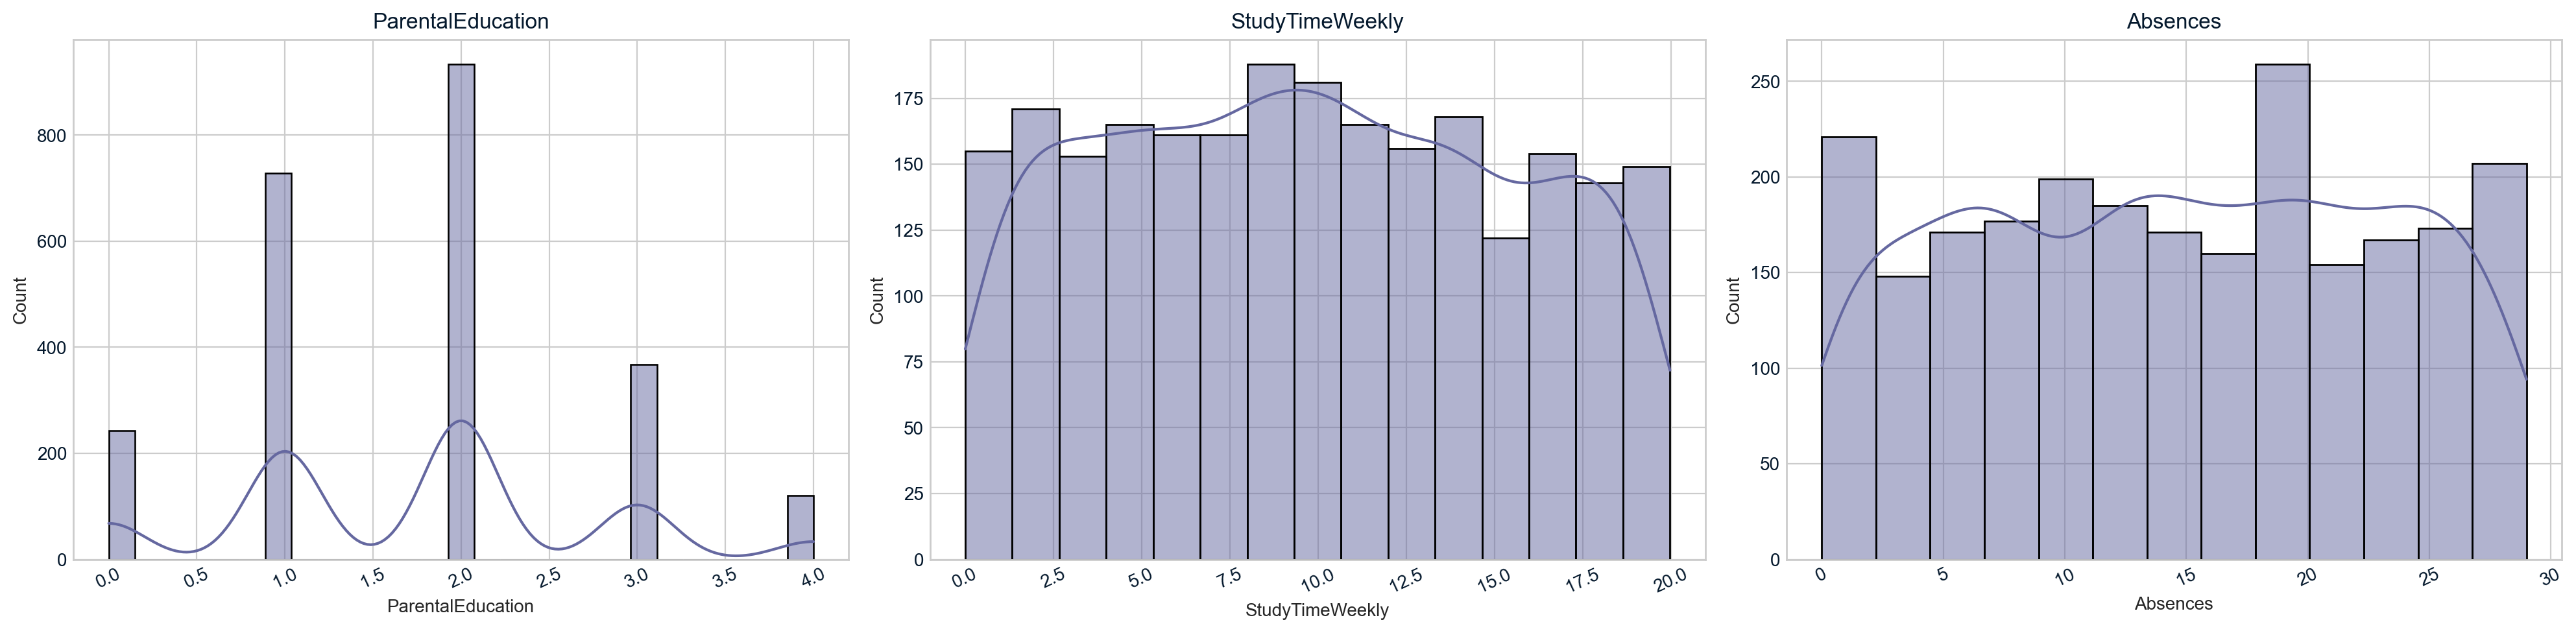

In [9]:
distribution(students, ["ParentalEducation", "StudyTimeWeekly", "Absences"])

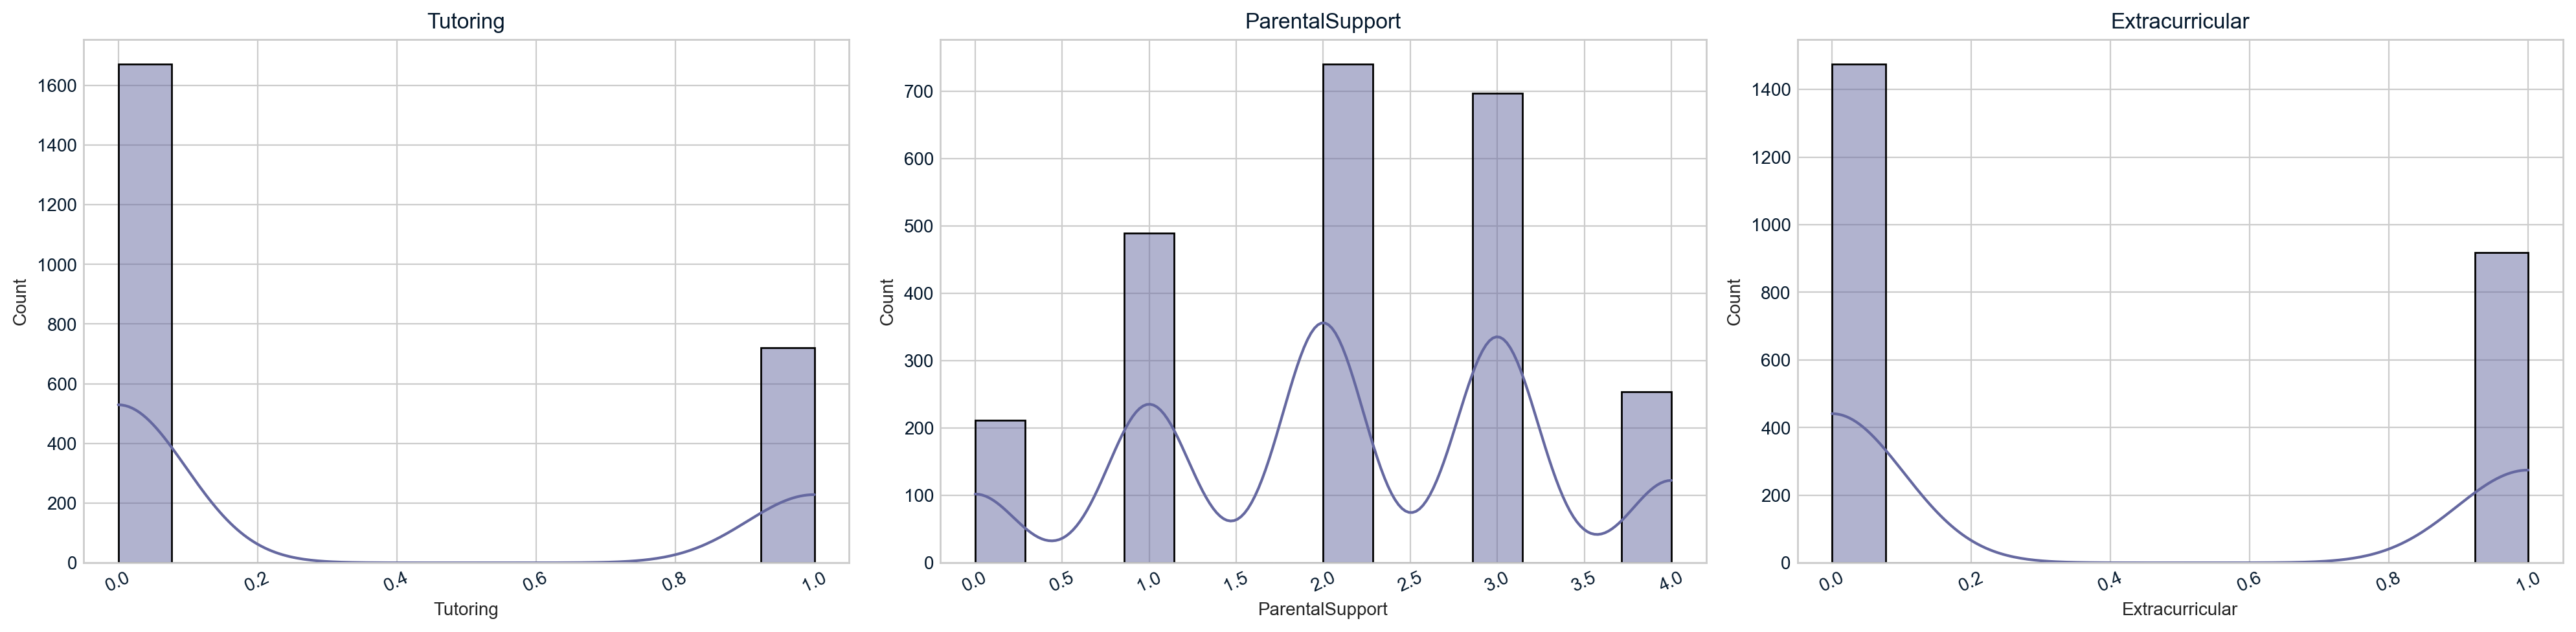

In [10]:
distribution(students, ["Tutoring", "ParentalSupport", "Extracurricular"])

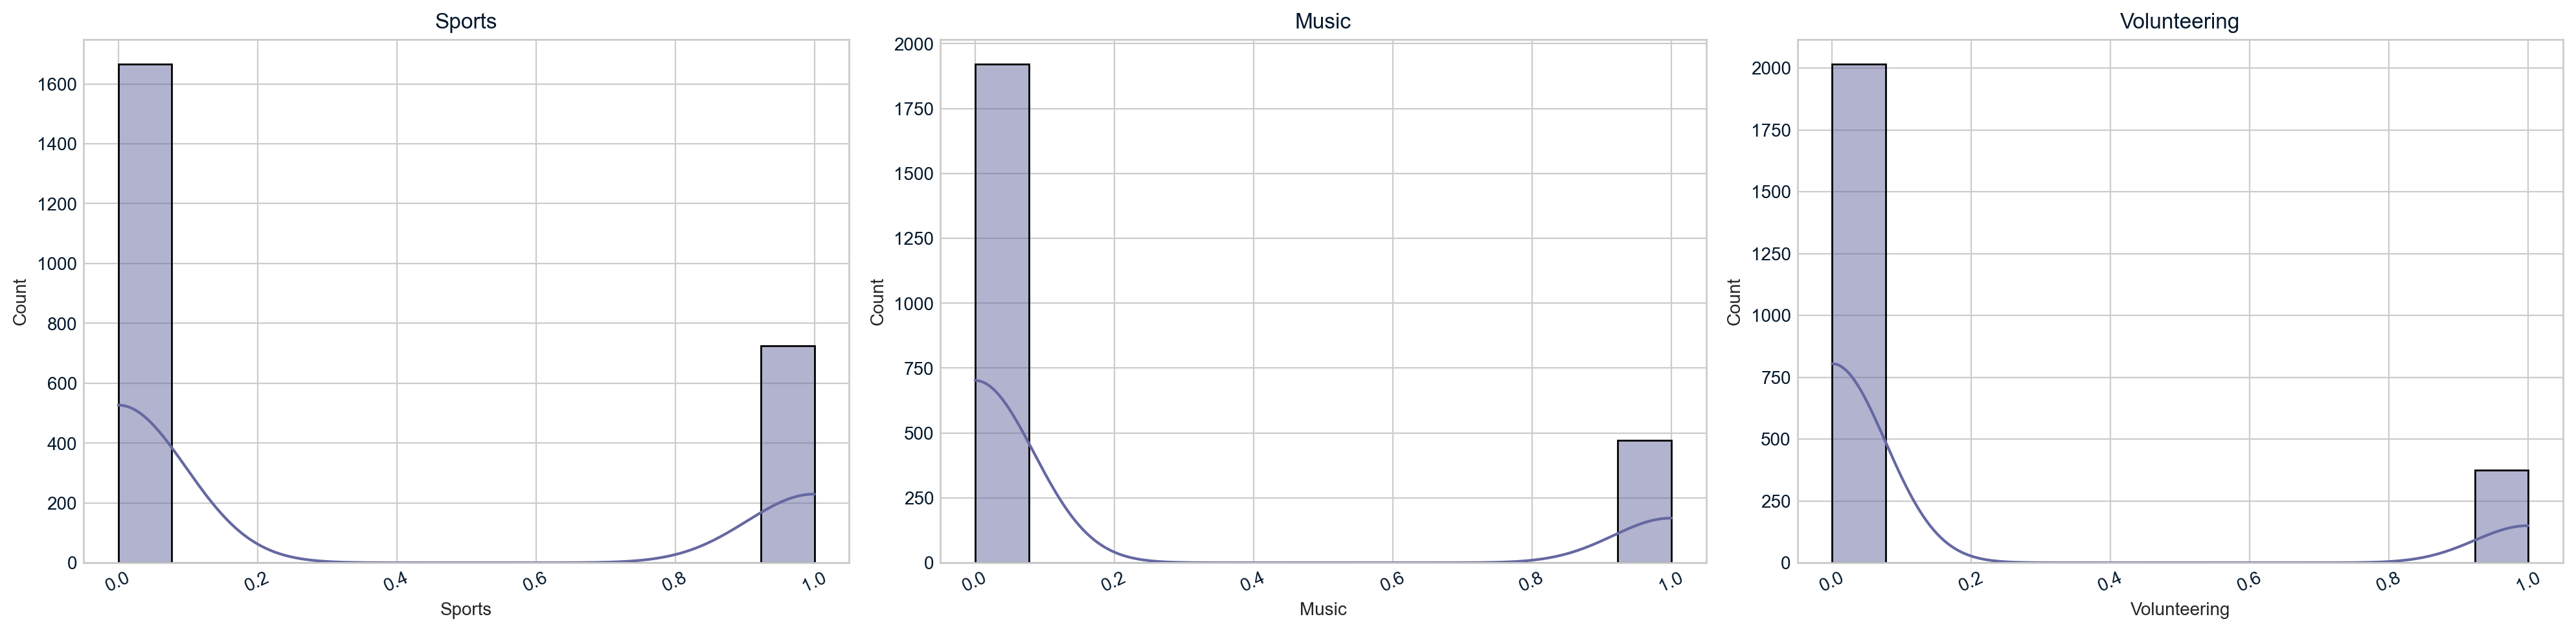

In [11]:
distribution(students, ["Sports", "Music", "Volunteering"])

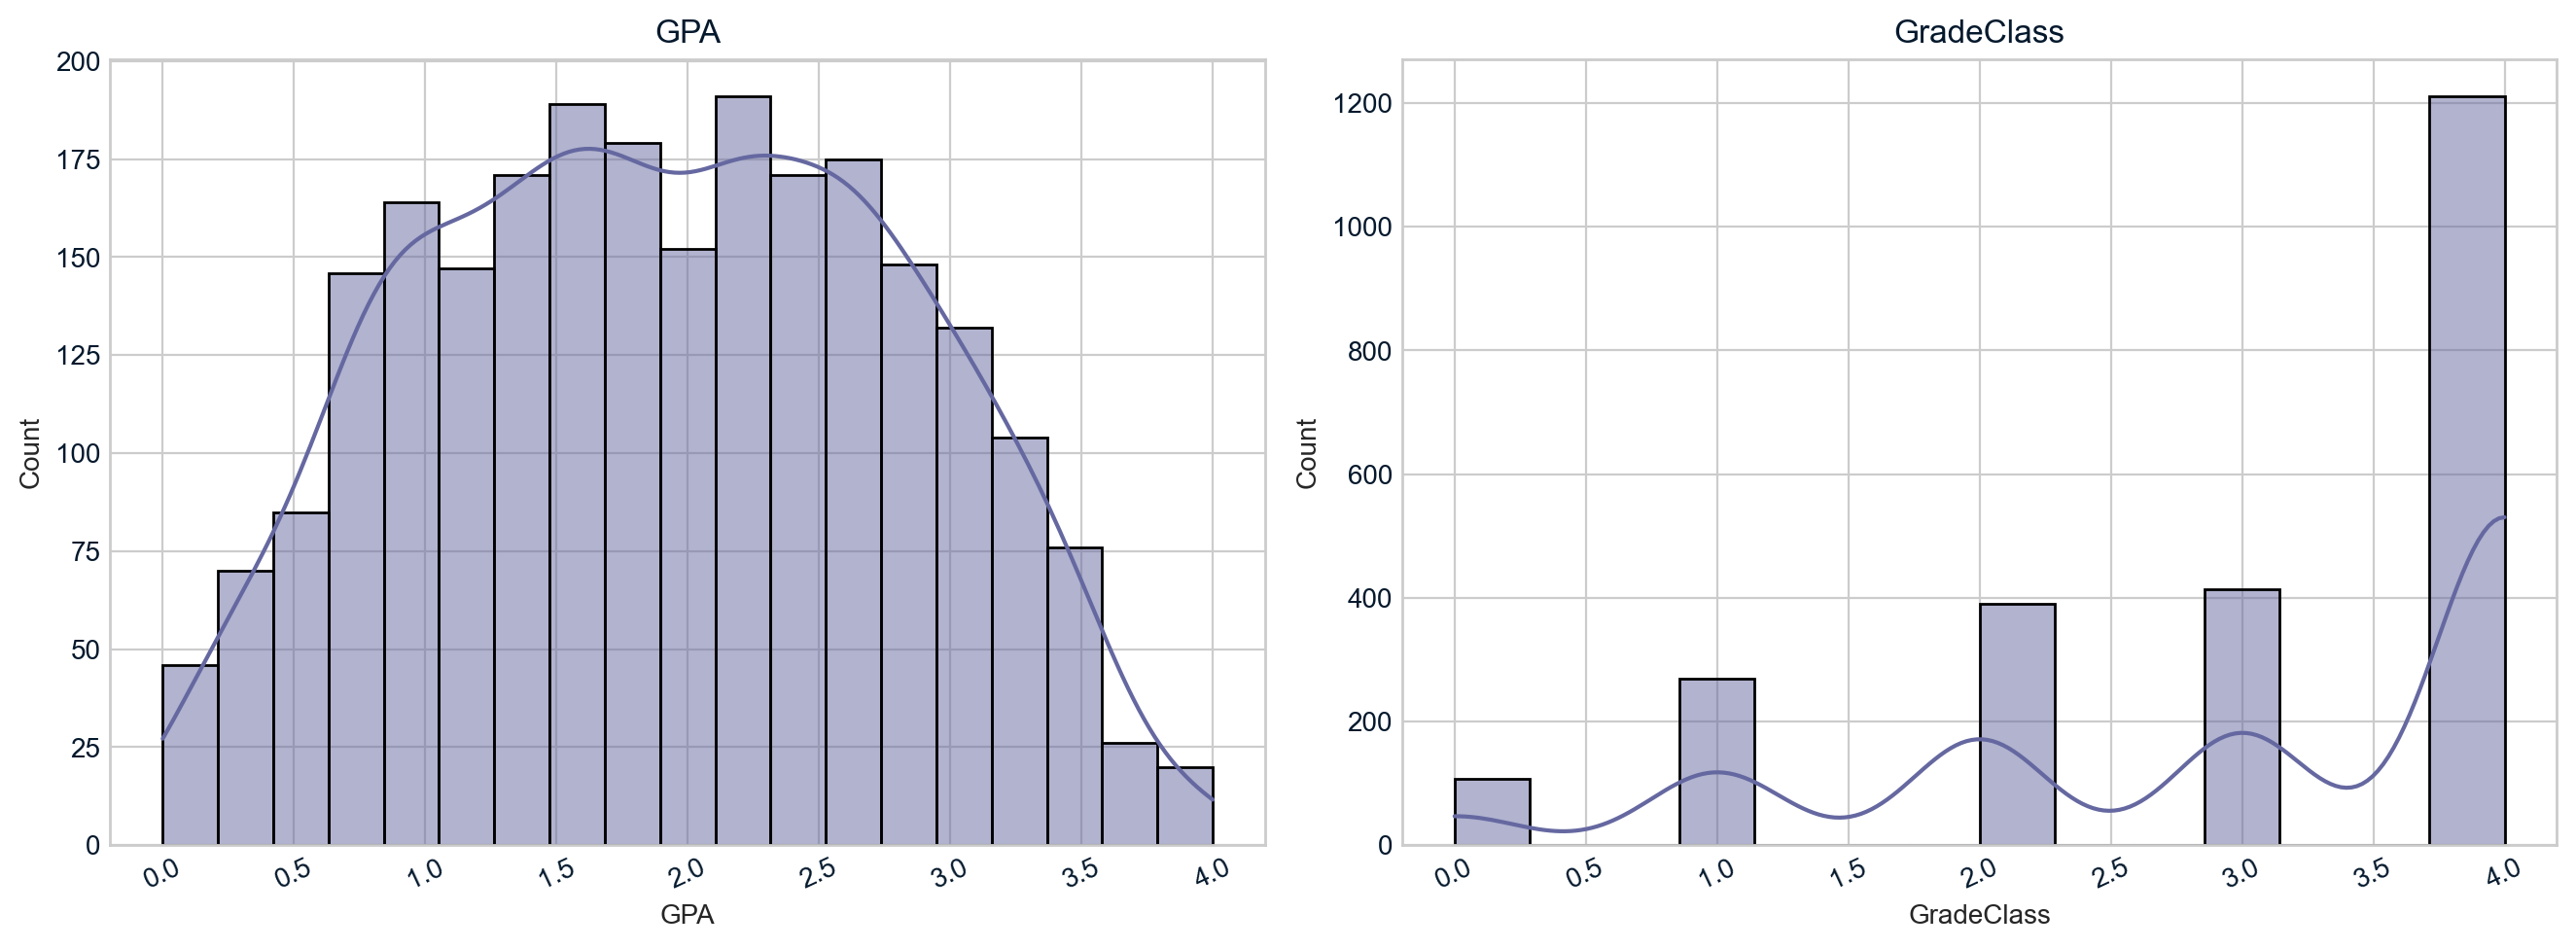

In [12]:
distribution(students, ["GPA", "GradeClass"])

The GradeClass variable exhibits a right-skewed distribution, indicating a class imbalance with an overrepresentation of lower grade classes

### Correlation Matrix

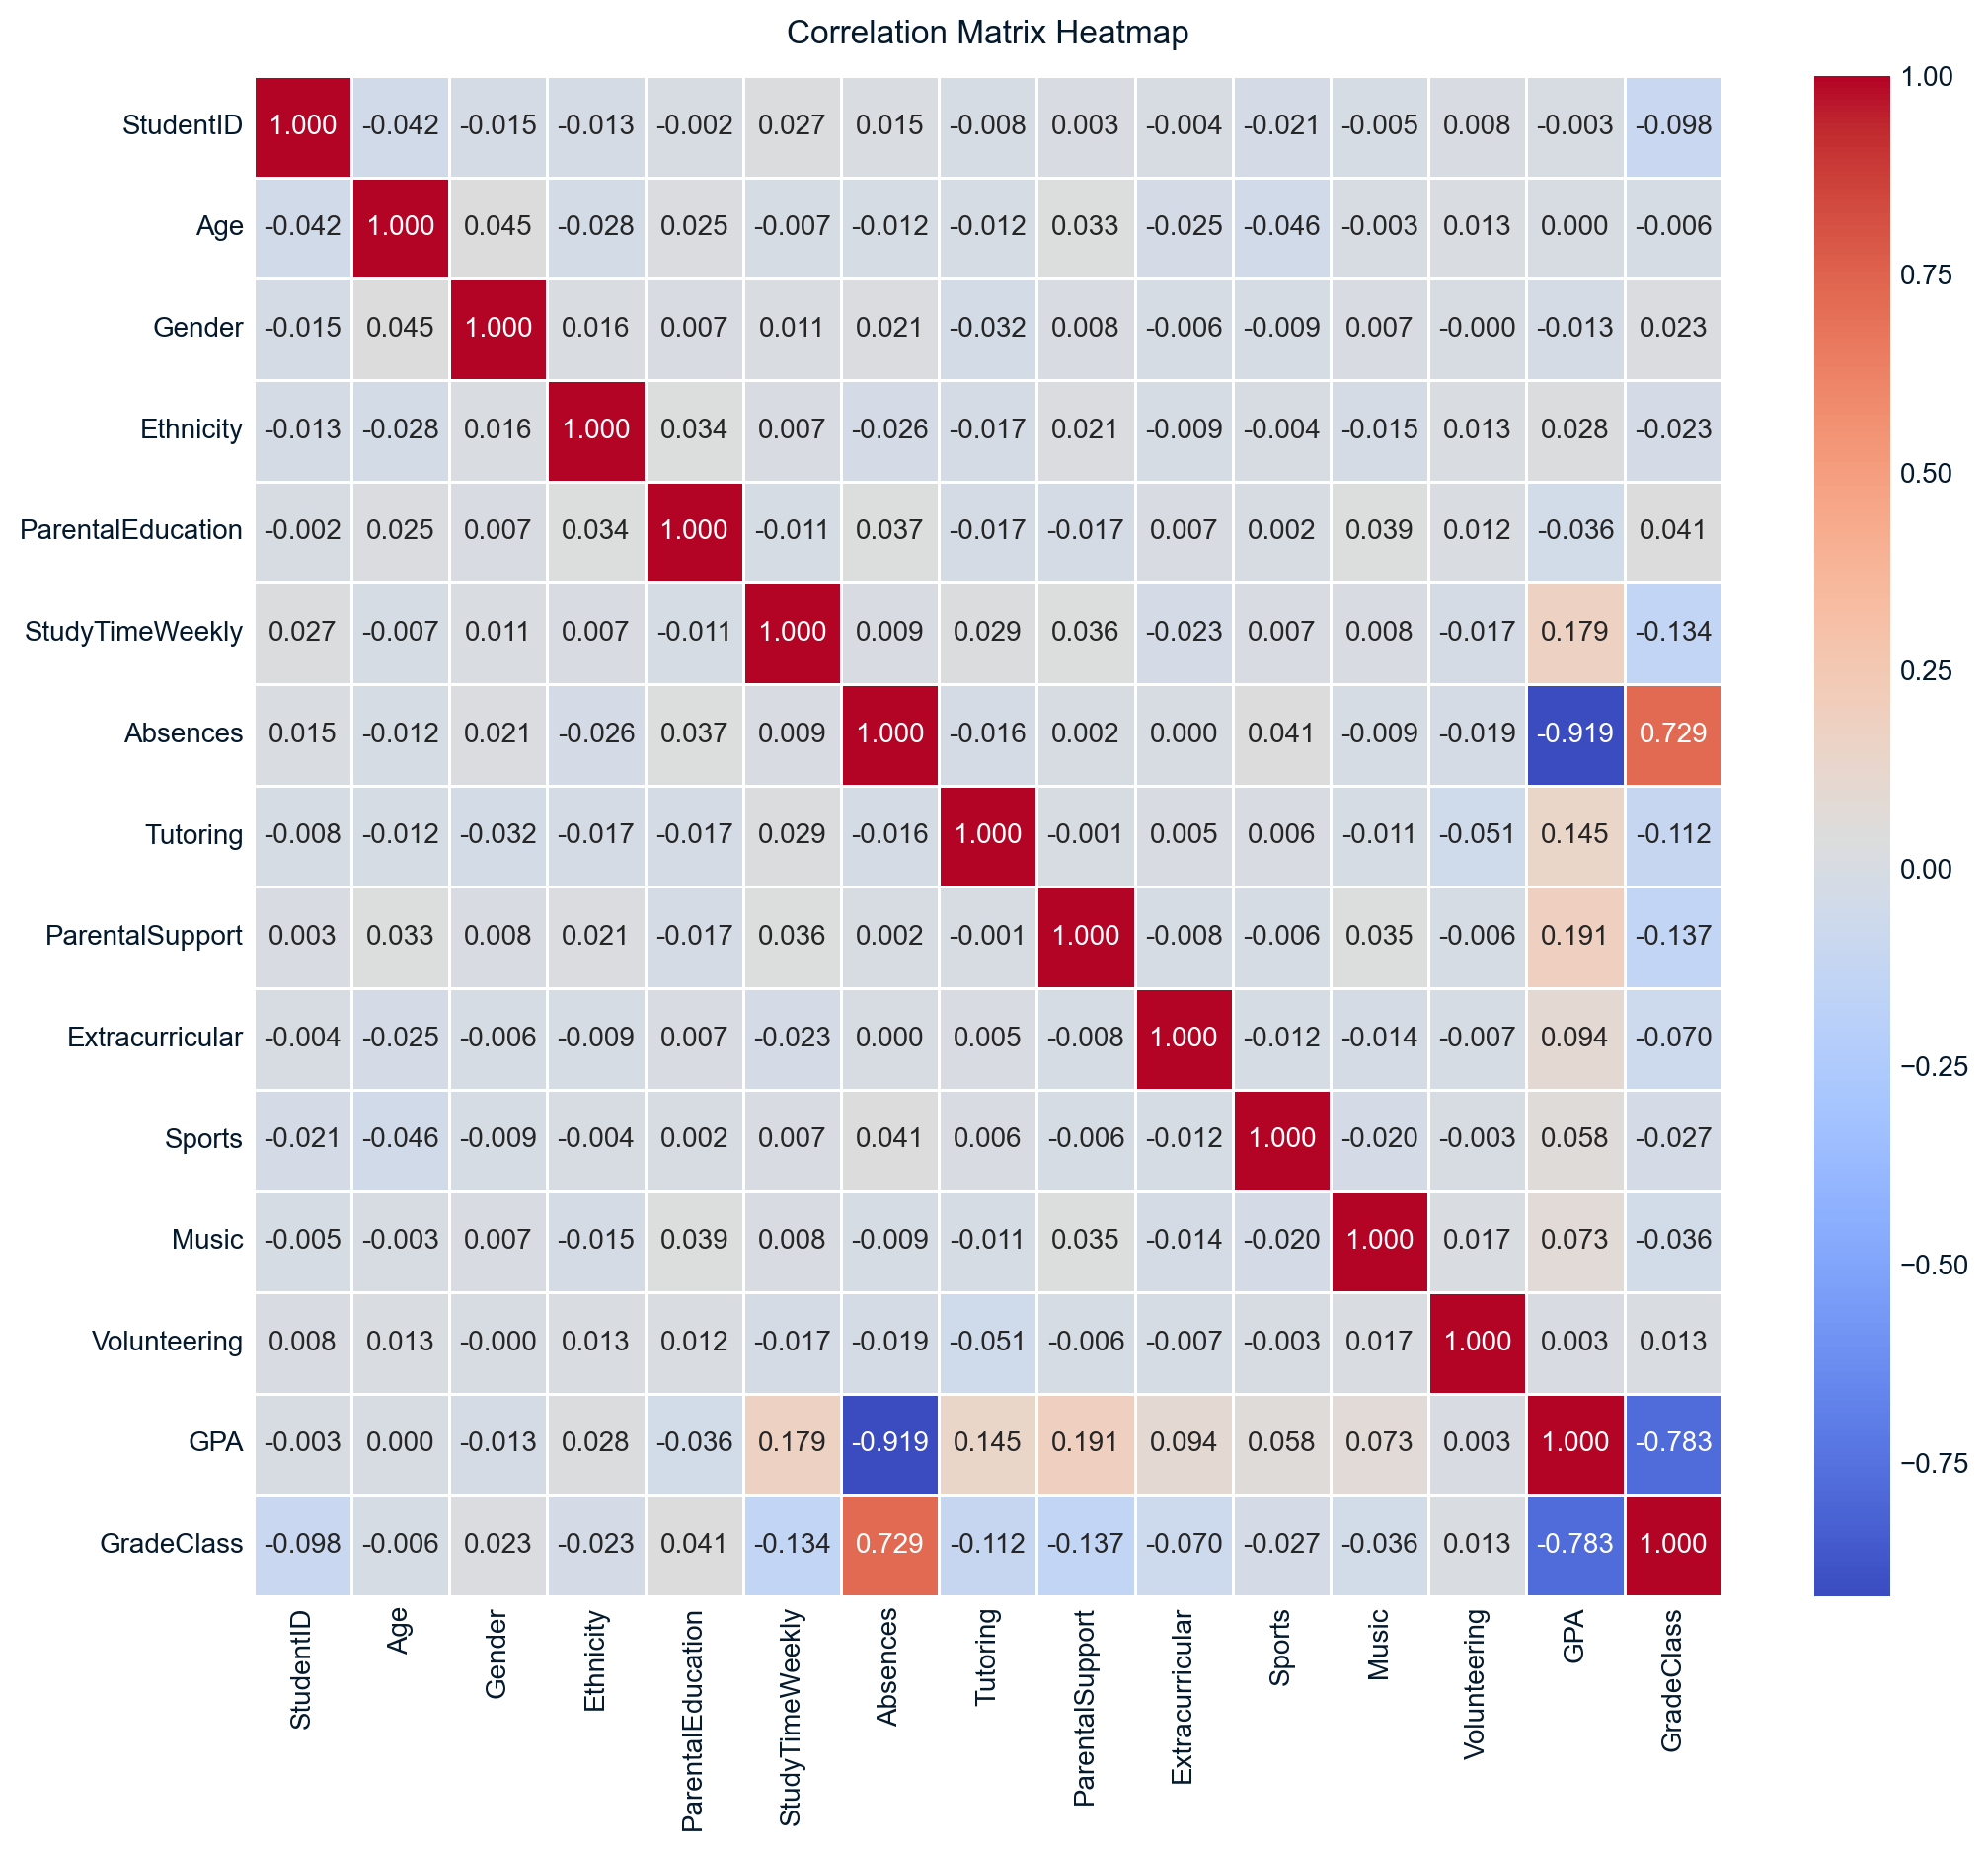

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(students.corr(), annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontdict={'fontsize': 12}, pad=12)
plt.show()

Absences and GPA have a very strong negative correlation coefficient of **-0.919**. This indicates that students with higher absence rates tend to have lower GPAs, which is unsurprising.

This matrix/heatmap provides a valuable starting point for understanding the relationships between different variables in your student data.

## Data Clearning and Preprocessing

- Define mappings for categorical variables like `Ethnicity`, `ParentalEducation`, `Tutoring`, `ParentalSupport`, `Extracurricular`, `Activities`, `Sports`, `Music`, and `Volunteering` to convert numerical codes into descriptive labels

In [14]:
ethnicity = {0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'}
parental_education = {0: 'None', 1: 'High School', 2: 'Some College', 3: "Bachelor's", 4: 'Higher'}
tutoring = {0: 'No', 1: 'Yes'}
parental_support = {0: 'None', 1: 'Low', 2: 'Moderate', 3: 'High', 4: 'Very High'}
extracurricular = {0: 'No', 1: 'Yes'}
sports = {0: 'No', 1: 'Yes'}
music = {0: 'No', 1: 'Yes'}
volunteering = {0: 'No', 1: 'Yes'}
gender = {0: 'Male', 1: "Female" }

- Create a copy of the dataset, assign it to a variable

In [15]:
students_copy = pd.read_csv(dataset_url)

- Iterating through specified columns and replacing numerical values with corresponding descriptive labels using the created mapping dictionaries

In [16]:
students_copy['Ethnicity'] = students['Ethnicity'].map(ethnicity)
students_copy['ParentalEducation'] = students['ParentalEducation'].map(parental_education)
students_copy['Tutoring'] = students['Tutoring'].map(tutoring)
students_copy['ParentalSupport'] = students['ParentalSupport'].map(parental_support)
students_copy['Extracurricular'] = students['Extracurricular'].map(extracurricular)
students_copy['Sports'] = students['Sports'].map(sports)
students_copy['Music'] = students['Music'].map(music)
students_copy['Volunteering'] = students['Volunteering'].map(volunteering)
students_copy['Gender'] = students['Gender'].map(gender)

- Display the new DataFrame, first five (5) rows

In [17]:
students_copy.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Female,Caucasian,Some College,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196,2.0
1,1002,18,Male,Caucasian,High School,15.408756,0,No,Low,No,No,No,No,3.042915,1.0
2,1003,15,Male,Asian,Bachelor's,4.210570,26,No,Moderate,No,No,No,No,0.112602,4.0
3,1004,17,Female,Caucasian,Bachelor's,10.028829,14,No,High,Yes,No,No,No,2.054218,3.0
4,1005,17,Female,Caucasian,Some College,4.672495,17,Yes,High,No,No,No,No,1.288061,4.0


## Data Visualization II

### Analysis of Factors Influencing GPA

This analysis explores the relationship between various factors and students' GPA.

- List all columns to analyze

In [18]:
columns_to_analyze = ["Age", "StudyTimeWeekly", "Absences", "ParentalEducation", 
                       "Tutoring", "ParentalSupport", "Extracurricular", 
                       "Sports", "Music", "Volunteering"]

- Use scatter plots with regression lines to examine individual relationships between each factor and GPA

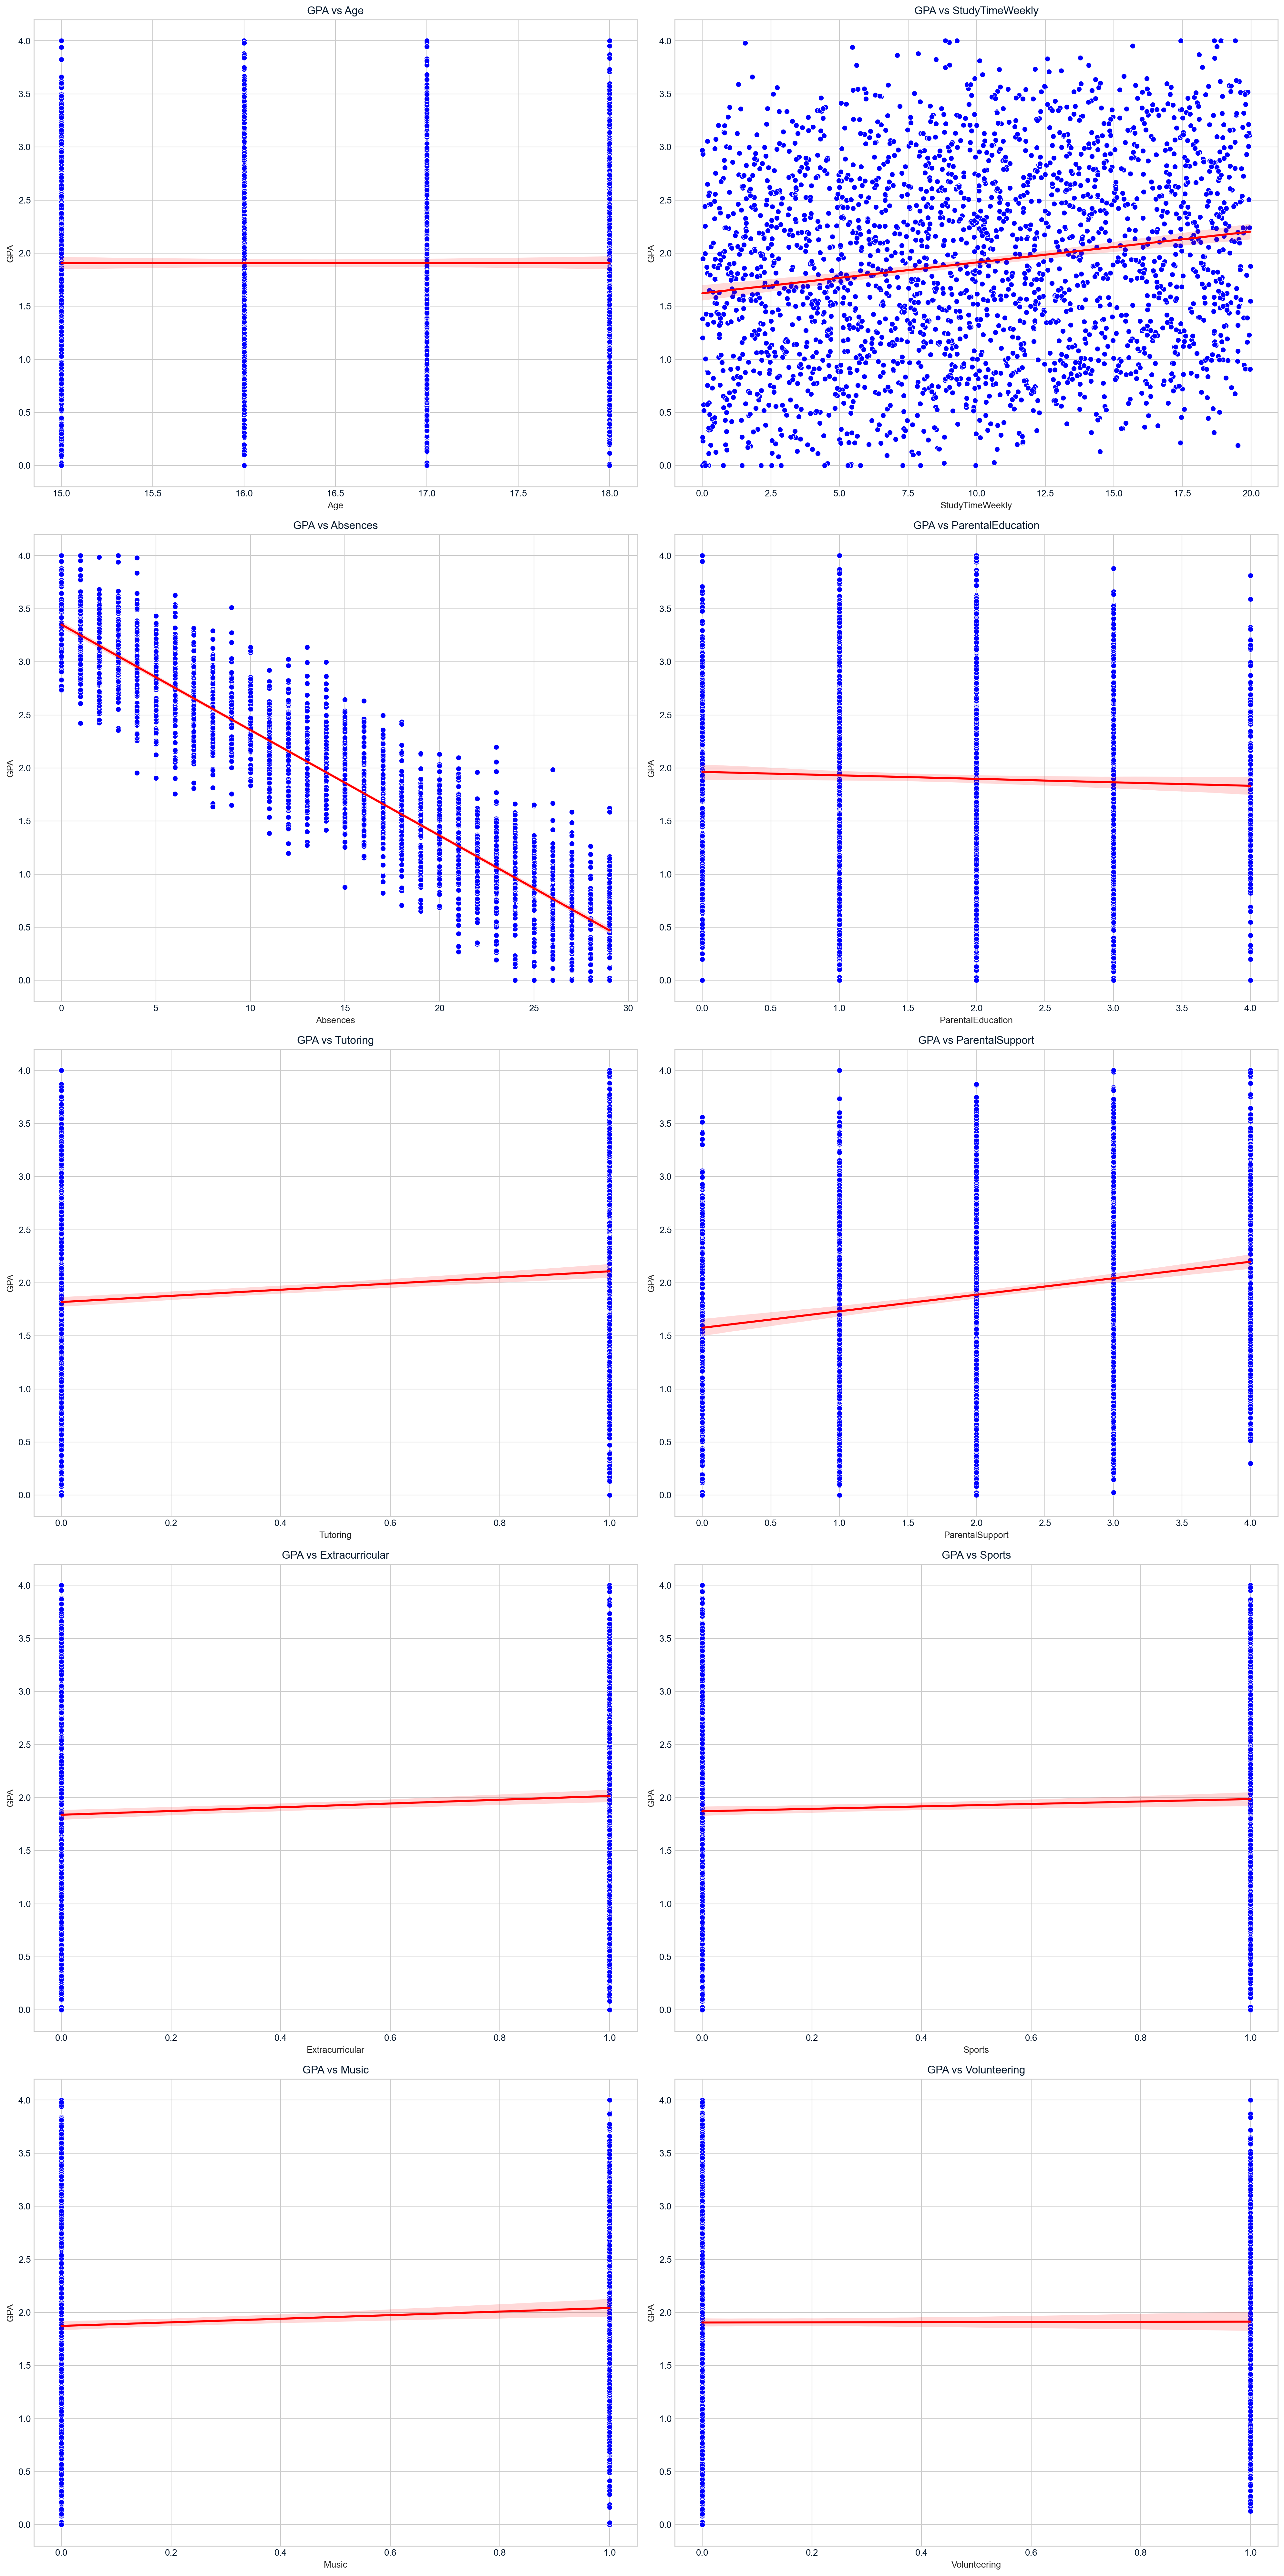

In [19]:
plt.figure(figsize=(20, 40))

num_columns = 2
num_rows = (len(columns_to_analyze) + num_columns - 1) // num_columns

for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.scatterplot(data=students, x=column, y='GPA', color='blue')
    sns.regplot(data=students, x=column, y='GPA', scatter=False, color='red')
    plt.title(f'GPA vs {column}')
    plt.xlabel(column)
    plt.ylabel('GPA')

plt.tight_layout()
plt.show()

The provided scatterplots visualize the relationship between several factors and GPA.

So here are the key findings:   
- `StudyTimeWeekly` has a clear negative correlation is evident, suggesting that increased study time is generally associated with higher GPAs.
- `Absences` has a strong negative correlation exists, indicating that a higher number of absences tends to correlate with lower GPAs.
- While `Tutoring`, `ParentalSupport`, `Extracurricular`, `Sports`, `Music`, and `Volunteering`, these factors exhibit minimal to no apparent correlation with GPA based on the scatterplots.

Preliminary analysis indicates that `StudyTimeWeekly` and `Absences` are potential predictors of GPA. 

### Analysis of GPA by Ethnicity with Age and Gender Categories

This analysis visualizes the impact of ethnicity on GPA while categorizing by age and gender.

Purpose of doing this analysis is when analyzing GPA in the context of ethnicity, age, and gender provides a more nuanced understanding of academic performance. It helps identify if certain demographic factors contribute to GPA disparities, which can inform targeted interventions or support strategies to address educational inequalities. By visualizing these relationships, we can gain insights into how different factors interact and impact student performance.

- GPA according to Ethnicity categorized by Age

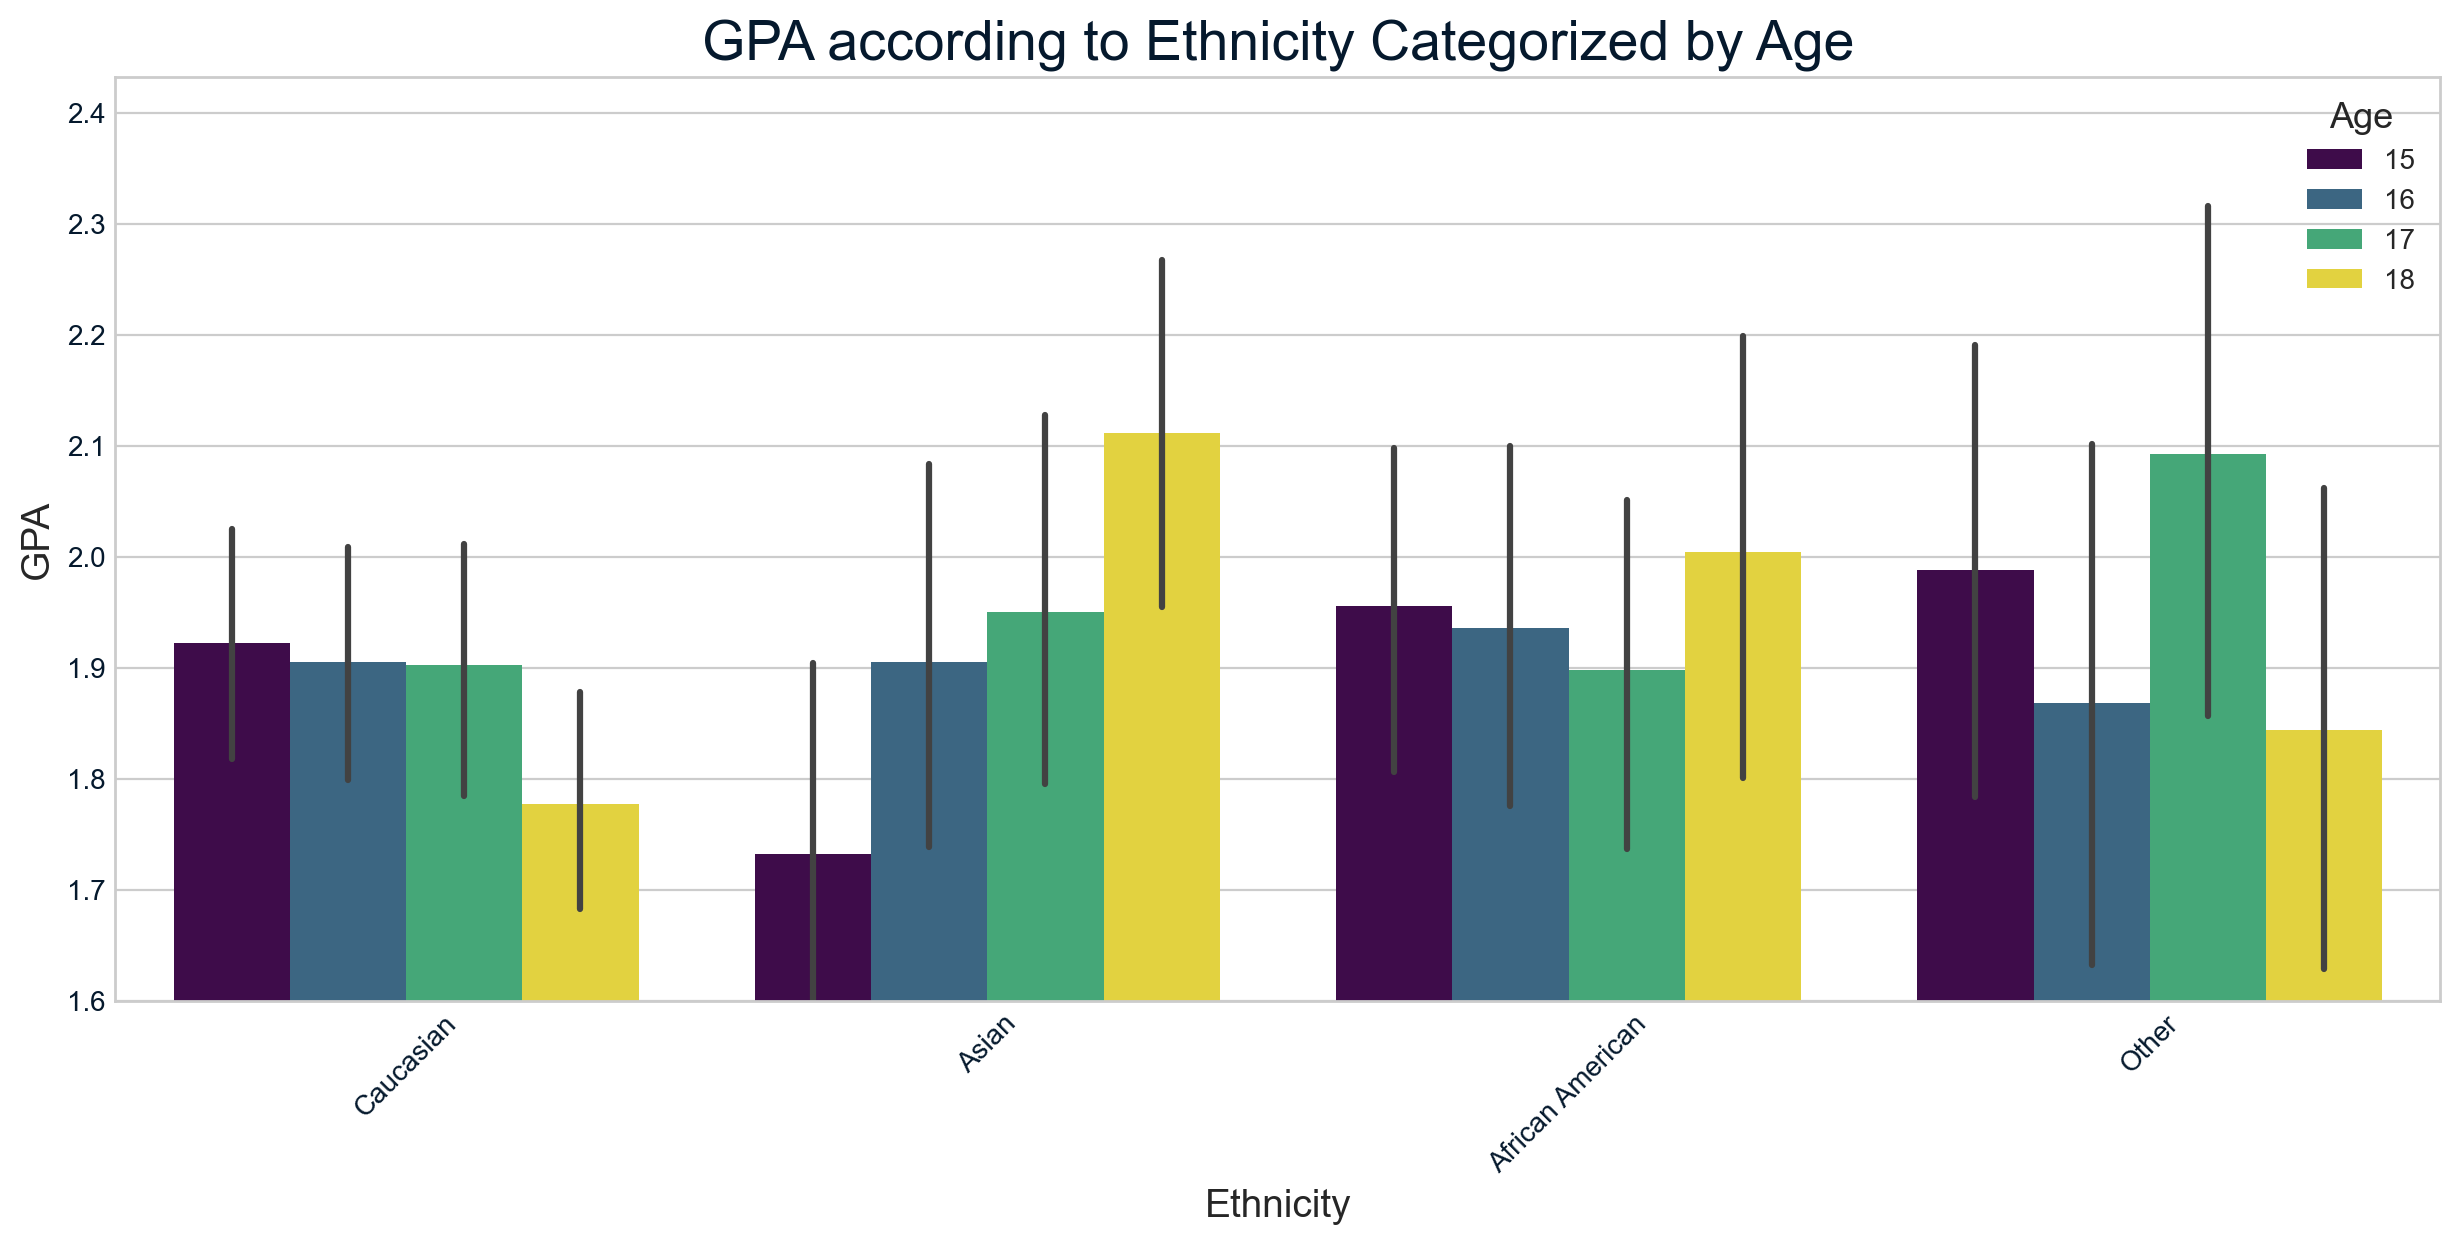

In [20]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Ethnicity', y='GPA', hue='Age', data=students_copy, palette='viridis')
plt.ylim(bottom=1.6)  # Adjust y-axis to better visualize GPA range
plt.title("GPA according to Ethnicity Categorized by Age", fontsize=20)
plt.xlabel('Ethnicity', fontsize=14)
plt.ylabel('GPA', fontsize=14)
plt.legend(title='Age', title_fontsize='13', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

A significant interaction effect exists between ethnicity and age on GPA. GPA exhibits substantial heterogeneity across ethnic and age cohorts. Notably, Asian students consistently outperform other groups across all age brackets, followed by Caucasian students. Conversely, African American and Other ethnicities demonstrate lower average GPAs.
- GPA according to Ethnicity categorized by Gender

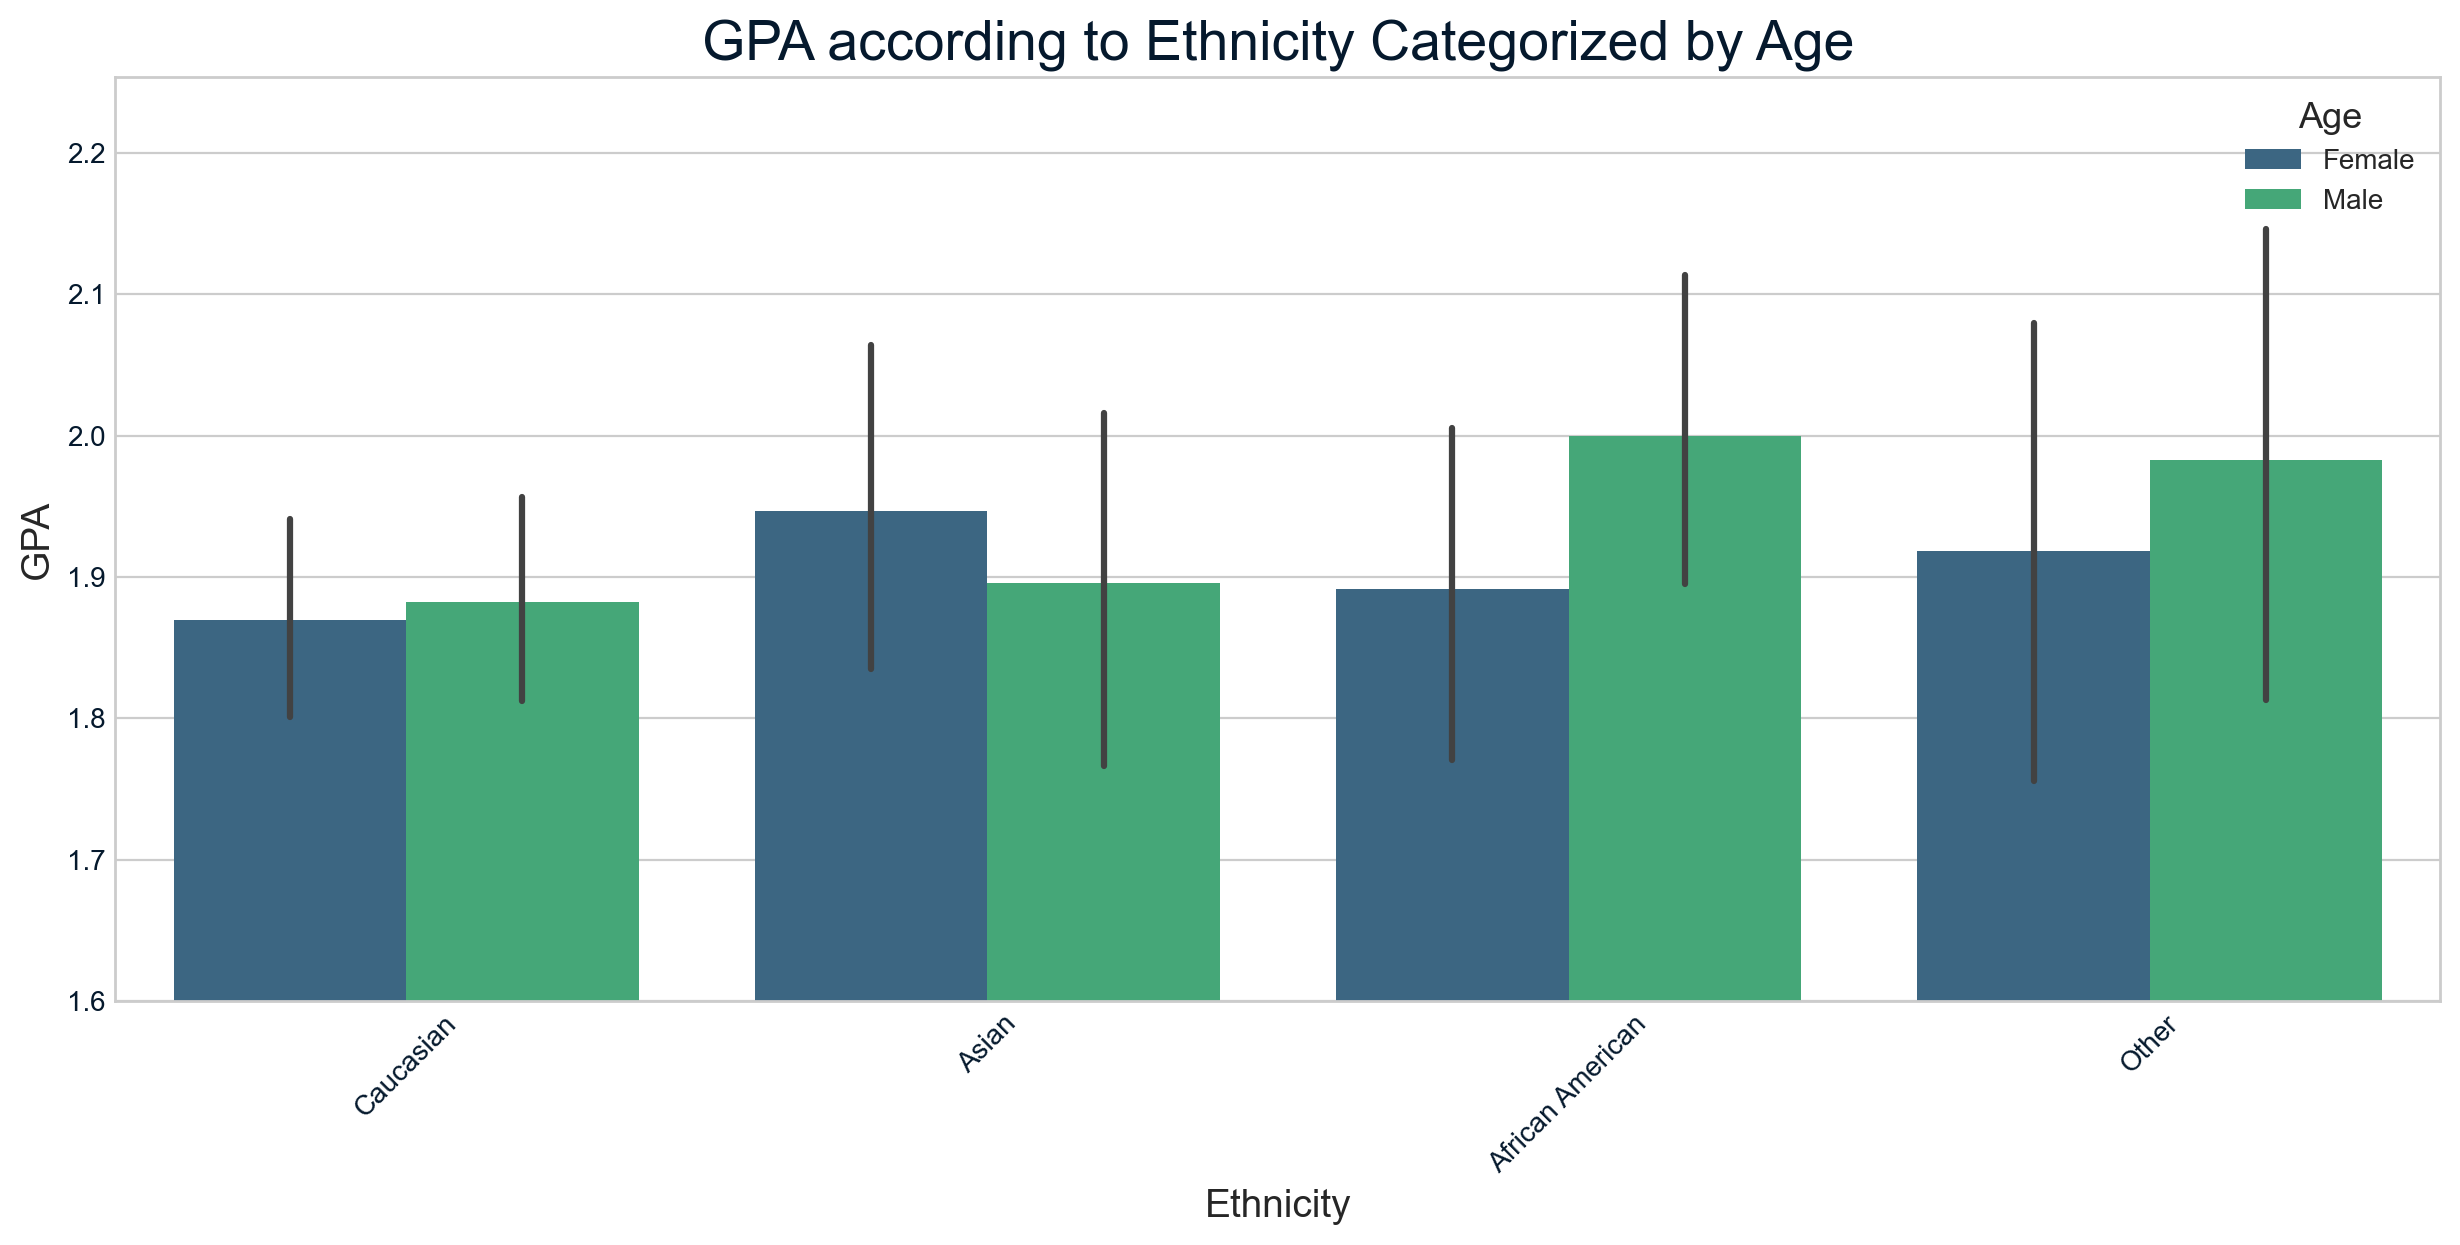

In [21]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Ethnicity', y='GPA', hue='Gender', data=students_copy, palette='viridis')
plt.ylim(bottom=1.6)  # Adjust y-axis to better visualize GPA range
plt.title("GPA according to Ethnicity Categorized by Age", fontsize=20)
plt.xlabel('Ethnicity', fontsize=14)
plt.ylabel('GPA', fontsize=14)
plt.legend(title='Age', title_fontsize='13', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

A clear gender gap is evident, with male students consistently outperforming female students across all ethnicities.

## Predictive Modeling

### Regression Analysis

1. Linear Regression
2. Ridge Regression

- Prepare the data

In [22]:
features = ["Age", "StudyTimeWeekly", "Absences", "ParentalEducation", 
            "Tutoring", "ParentalSupport", "Extracurricular", 
            "Sports", "Music", "Volunteering"]

X = students_copy[features]
y = students_copy['GPA']

- Convert categorical features to dummy variables

In [23]:
X = pd.get_dummies(X, drop_first=True)

- Split the data into features (X) and target (y)
- Split the data into training and testing sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Define a function to evaluate the model

In [25]:
def evaluate_model(y_true, y_pred, model_name):
    print(f'{model_name} Performance')
    print(f'R-squared: {r2_score(y_true, y_pred):.2f}')
    print(f'Mean Absolute Error: {mean_absolute_error(y_true, y_pred):.2f}')
    print(f'Mean Squared Error: {mean_squared_error(y_true, y_pred):.2f}')

#### Linear Regression

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

- Evaluate the model

In [27]:
evaluate_model(y_test, y_pred_lr, 'Linear Regression')

Linear Regression Performance
R-squared: 0.95
Mean Absolute Error: 0.16
Mean Squared Error: 0.04


The high R-squared and low MAE and MSE indicate that the Linear Regression model performs exceptionally well in predicting GPA. This suggests that the features used are highly relevant and contribute significantly to explaining the variance in GPA.

#### Ridge Regression

In [28]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

- Evaluate the model

In [29]:
evaluate_model(y_test, y_pred_ridge, 'Ridge Regression')

Ridge Regression Performance
R-squared: 0.95
Mean Absolute Error: 0.16
Mean Squared Error: 0.04


Ridge Regression is performing comparably to Linear Regression with the current dataset and parameters. It has similar predictive accuracy and error metrics, indicating that the regularization effect is not significantly altering the model’s performance in this case. 

*However, experimenting with different alpha values and validating the model further could provide additional insights.*

### Classification Models

1. Logistic Regression
2. Decision Trees
3. Random Forest
4. Gradient Boosting

- Convert the `GPA` into categorical grades 

In [30]:
bins = [0, 1.0, 2.0, 3.0, 4.0]
labels = ['F', 'C', 'B', 'A']
students_copy['GradeClass'] = pd.cut(students_copy['GPA'], bins=bins, labels=labels, right=False)

- Prepare the data

In [31]:
X = students_copy[features]
y = students_copy['GradeClass']

- Convert categorical features to dummy variables

In [32]:
X = pd.get_dummies(X, drop_first=True)

-  Encode target variable

In [33]:
le = LabelEncoder()
y = le.fit_transform(y)

- Split the data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Define a function to evaluate the classification models

In [35]:
def evaluate_classification(y_true, y_pred, model_name, le=None):
    print(f'{model_name} Performance')
    print(f'Accuracy: {accuracy_score(y_true, y_pred):.2f}')
    if le is not None:
        print(f'Classification Report:\n{classification_report(y_true, y_pred, target_names=le.classes_)}')
    else:
        print(f'Classification Report:\n{classification_report(y_true, y_pred)}')

#### Logistic Regression

In [36]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

- Evaluate the model

In [37]:
evaluate_classification(y_test, y_pred_log_reg, 'Logistic Regression')

Logistic Regression Performance
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        63
           1       0.85      0.84      0.84       165
           2       0.85      0.86      0.86       166
           3       0.89      0.90      0.90        83
           4       0.00      0.00      0.00         2

    accuracy                           0.85       479
   macro avg       0.68      0.69      0.68       479
weighted avg       0.85      0.85      0.85       479



#### Decision Tree

In [38]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

- Evaluate the model

In [39]:
evaluate_classification(y_test, y_pred_dt, 'Decision Tree')

Decision Tree Performance
Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.65      0.65        63
           1       0.74      0.71      0.72       165
           2       0.71      0.70      0.71       166
           3       0.70      0.77      0.73        83
           4       0.00      0.00      0.00         2

    accuracy                           0.71       479
   macro avg       0.56      0.57      0.56       479
weighted avg       0.70      0.71      0.70       479



#### Random Forest

In [40]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

- Evaluate the model

In [41]:
evaluate_classification(y_test, y_pred_rf, 'Random Forest')

Random Forest Performance
Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.68      0.74        63
           1       0.77      0.84      0.81       165
           2       0.81      0.81      0.81       166
           3       0.86      0.83      0.85        83
           4       0.00      0.00      0.00         2

    accuracy                           0.80       479
   macro avg       0.65      0.63      0.64       479
weighted avg       0.80      0.80      0.80       479



#### Gradient Boosting

In [42]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

- Evaluate the model

In [43]:
evaluate_classification(y_test, y_pred_gb, 'Gradient Boosting')

Gradient Boosting Performance
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74        63
           1       0.80      0.79      0.80       165
           2       0.83      0.85      0.84       166
           3       0.88      0.89      0.89        83
           4       0.00      0.00      0.00         2

    accuracy                           0.82       479
   macro avg       0.65      0.65      0.65       479
weighted avg       0.81      0.82      0.82       479



### Feature Selection

Identify the most relevant features for predicting GPA.

#### Recursive Feature Elimination (RFE)

- Apply RFE with a chosen model (e.g., Linear Regression) to select features based on their importance

In [44]:
selector = RFE(lr, n_features_to_select=5)
selector = selector.fit(X_train, y_train)
selected_features = [f for f, s in zip(X.columns, selector.support_) if s]
print(f"Selected Features using RFE:\n{selected_features}")

Selected Features using RFE:
['Tutoring_Yes', 'ParentalSupport_Low', 'ParentalSupport_Moderate', 'ParentalSupport_None', 'Music_Yes']


Recursive Feature Elimination (RFE) pinpointed five features as the most predictive of GPA, encompassing varying degrees of parental support and engagement in tutoring and music. These variables emerged as salient determinants of academic achievement. Predictive models, including Linear and Ridge Regression, exhibited robust performance, explaining 95% of GPA variance. Additionally, the classification model demonstrated efficacy. RFE's feature selection process yielded actionable insights into the factors driving GPA, providing a foundation for understanding academic success.

#### Feature Importance

- Use models like Random Forest to get feature importances directly

In [45]:
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(f"Feature Importances from Random Forest:\n{feature_importances}")

Feature Importances from Random Forest:
Absences                          0.538235
StudyTimeWeekly                   0.177193
Age                               0.052334
Extracurricular_Yes               0.025795
Tutoring_Yes                      0.024166
Sports_Yes                        0.023536
ParentalSupport_Low               0.019648
ParentalSupport_Moderate          0.019059
ParentalEducation_Some College    0.018891
Music_Yes                         0.017854
ParentalEducation_High School     0.017813
Volunteering_Yes                  0.017509
ParentalSupport_None              0.016613
ParentalSupport_Very High         0.013383
ParentalEducation_None            0.010776
ParentalEducation_Higher          0.007195
dtype: float64


##### Top Influential Features

1. `Absences` - The number of absences is the most critical factor influencing GPA. This suggests that regular attendance is crucial for academic success. Schools should focus on attendance improvement programs to help students maintain consistent attendance.
2. `StudyTimeWeekly` - The amount of time students spend studying each week significantly impacts their GPA. Encouraging effective study habits and providing resources for time management could help improve academic performance.
3. `Age` -  Age has a noticeable effect on GPA, though less significant than absences and study time. This could reflect maturity levels or the difference in academic expectations at different ages.
4. `Sports_Yes` -  Participation in sports has a positive impact on GPA, highlighting the importance of physical activities and their role in overall student development.
5. `Extracurricular_Yes` - Involvement in extracurricular activities also positively influences GPA, suggesting that balanced involvement in school activities can enhance academic performance.
6. `Tutoring_Yes` - Receiving tutoring is beneficial for students' GPA, indicating that additional academic support outside regular classes is effective.

##### Moderate Influential Features

1. `ParentalEducation_Some College` - The educational level of parents, specifically those with some college education, moderately impacts GPA. This may reflect the value of education passed on to students.
2. `ParentalSupport_Moderate` & `ParentalSupport_Low` - Moderate and low levels of parental support are crucial, though less impactful than the top features. This suggests that even some level of parental involvement can positively influence students' academic outcomes.
3. `Music_Yes` - Participation in music activities has a moderate positive impact on GPA, reinforcing the value of artistic pursuits in education.
4. `Volunteering_Yes` - Engaging in volunteer activities slightly benefits GPA, which may be related to the development of soft skills and a sense of responsibility.

##### Lesser Influential Features

1. `ParentalEducation_High School` - Parents with a high school education have a smaller, yet still positive, influence on their children's GPA.
2. `ParentalSupport_None` - Lack of parental support negatively affects GPA, though it's less impactful compared to having some level of support.
3. `ParentalSupport_Very High` - Interestingly, very high levels of parental support have a smaller impact than expected, suggesting that over-involvement may not be as beneficial as balanced support.
4. `ParentalEducation_None` & `ParentalEducation_Higher` - Both no education and higher education levels of parents have the least impact on GPA among the considered features. This may imply that the educational environment and direct academic support are more critical than parental education alone.

Overall, Random Forest feature importance analysis identifies `Absences` and `StudyTimeWeekly` as the primary predictors of GPA. Participation in sports, extracurricular activities, and tutoring also exhibit substantial predictive power. Parental education and support levels demonstrate varying degrees of influence, underscoring the multifaceted nature of factors impacting student academic outcomes.

## Predicting GPA for New Students

- Add new sample data

In [46]:
new_data = pd.DataFrame({
    'Absences': [3, 15],
    'StudyTimeWeekly': [10, 5],
    'Age': [16, 17],
    'Sports_Yes': [1, 0],
    'Extracurricular_Yes': [1, 1],
    'Tutoring_Yes': [0, 1],
    'ParentalEducation_Some College': [0, 1],
    'ParentalSupport_Moderate': [1, 0],
    'ParentalSupport_Low': [0, 1],
    'Music_Yes': [1, 0],
    'Volunteering_Yes': [0, 1],
    'ParentalEducation_High School': [1, 0],
    'ParentalSupport_None': [0, 1],
    'ParentalSupport_Very High': [0, 0],
    'ParentalEducation_None': [0, 0],
    'ParentalEducation_Higher': [0, 0]
})

- Preprocess the new data

In [47]:
new_data = new_data[X_train.columns]

scaler = StandardScaler()
scaler.fit(X_train)
new_data_scaled = scaler.transform(new_data)

### Predict using Linear Regression

In [48]:
lr_predictions = lr.predict(new_data_scaled)

### Predict using Ridge Regression

In [49]:
ridge_predictions = ridge.predict(new_data_scaled)

- Combine the prediction into a DataFrame for better readability

In [50]:
predictions_df = pd.DataFrame({
    'Record': new_data.index,
    'Linear Regression Prediction': lr_predictions,
    'Ridge Regression Prediction': ridge_predictions
})

- Preview the predicted GPA

In [51]:
predictions_df

,Record,Linear Regression Prediction,Ridge Regression Prediction
0,0,3.843881,3.841155
1,1,1.440181,1.454448
